<a href="https://colab.research.google.com/github/sauravkshukla/Churn_Analysis/blob/main/Pnemonia_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [12]:
!ls /content/gdrive/MyDrive


'12th Marksheet Sundaram.jpg'
'881034291905471_ PAN COPY CHHOTU.pdf'
'AICTE_Internship_2024_Project_Report_Template_2 (2).gdoc'
 Airtable
'Annual Calendar.gsheet'
' BADI CHACHI ADHAAR.pdf'
'BCA III.pdf'
'CHACHI PAN CARD.pdf'
'Colab Notebooks'
 Contact_Database.gsheet
'C# Project'
'CUET-Marksheet Sundaram.pdf'
'Datathon Dataset.csv'
 ed-system
'Epson iPrint'
' GAURAV ADHAAR.pdf'
'Hackathon Web'
'JavaScript Fundamentals - 2.gdoc'
'Linkedin Data.gsheet'
 LinkedIn_Data.gsheet
'LIVEWIRES '
'Maa Adhaar.pdf'
'MY ADHAR.pdf'
'My Certificates'
'MY E ADHAAR.pdf'
'MY E ADHAAR-unlocked.pdf'
'MY EWS.pdf'
'MY PART 2 Exam Form.pdf'
'My PW JAVA Certificate.pdf'
'My Resume'
'MY SELF DECLARED AFFIDAVIT.pdf'
'My Sem 1 Marksheet.jpg'
'MY VOTER ID.pdf'
'MY VOTERP ID KGV9195025.pdf'
 My_Works
'NAVNEET SHUKLA(00917004298081)_20210410215658.mp3'
'NPU__Result Saurav.pdf'
'PAPA JI ADHAAR ‌.pdf'
'PM INTERNSHIP OFFER LETTER.pdf'
 Pnemonia_xray
 Project
'Recording 2024-09-28 193613.mp4'
'SAURAV RESIDENCE 2021.pdf'


In [15]:
!unzip gdrive/MyDrive/Pnemonia_Xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import os

In [17]:
DataDir = r"train/"

In [18]:
CATEGORIES = ["normal" , "opacity"]

In [19]:
! ls test

ls: cannot access 'test': No such file or directory


In [22]:
!ls

chest_xray  drive  gdrive  sample_data


In [23]:
!ls chest_xray/test


NORMAL	PNEUMONIA


In [24]:
!ls chest_xray


chest_xray  __MACOSX  test  train  val


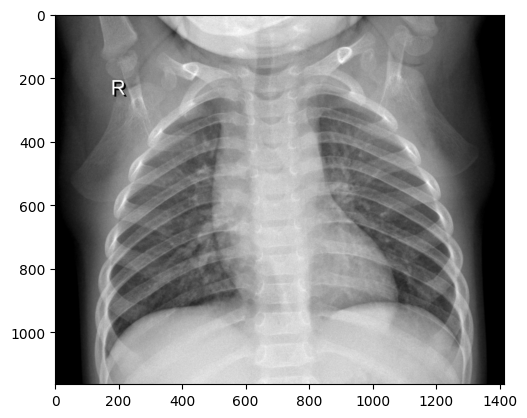

In [29]:
#converting the images into grayscale
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break


In [27]:
!ls chest_xray/train


NORMAL	PNEUMONIA


In [28]:
DataDir = "chest_xray/train"
CATEGORIES = ["NORMAL", "PNEUMONIA"]


In [30]:
img_size=100

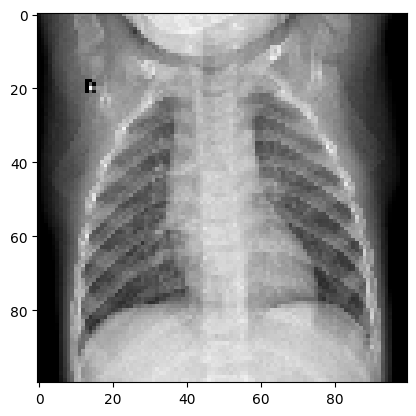

In [31]:
#image after resize and gray scale
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()


In [32]:
training_data=[]

In [33]:
#defining the function for training data according to the categories converting the images into gray scale with resize
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])

            except Exception as e:
                pass


In [34]:
create_training_data()

In [35]:
print(len(training_data))

5216


In [39]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[ 40,  44,  53, ..., 110, 113, 183],
       [ 36,  41,  51, ..., 114, 118, 249],
       [ 27,  40,  49, ..., 116, 189, 241],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[  9, 255,  10, ...,   9, 250, 252],
       [  9, 255,  10, ...,   7,  11,   9],
       [  9,   8,   9, ...,   9, 183, 195],
       ...,
       [ 11,  10,   8, ...,   8,   9,   9],
       [ 12,   8,   9, ...,   8,   9,   9],
       [ 10,   9,  13, ...,   8,   8,   8]], dtype=uint8), 1]
[array([[176, 183, 179, ...,  28,  19,  20],
       [190, 178, 167, ...,  20,  22,  19],
       [180, 183, 182, ...,  21,  24,  20],
       ...,
       [ 32,  31,  33, ...,  29,  29,  29],
       [ 32,  31,  31, ...,  29,  26,  28],
       [ 31,  33,  31, ...,  28,  32,  26]], dtype=uint8), 1]
[array([[39, 54, 65, ...,  0,  0,  0],
       [34, 52, 67, ...,  0,  0,  0],
       [35, 55, 58, ...,  0,  0,  0],


In [40]:
x=[]
y=[]

In [43]:
# splitting the features and labels
for features, label in training_data:
    x.append(features)
    y.append(label)

In [45]:

print(x[0].reshape(-1, img_size, img_size, 1))

[[[[ 40]
   [ 44]
   [ 53]
   ...
   [110]
   [113]
   [183]]

  [[ 36]
   [ 41]
   [ 51]
   ...
   [114]
   [118]
   [249]]

  [[ 27]
   [ 40]
   [ 49]
   ...
   [116]
   [189]
   [241]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]]


In [46]:
y = np.array(y)


In [48]:
# reshapping the features for making it compatible with tensorflow
x = np.array(x).reshape(-1, img_size, img_size, 1)

In [49]:
# as we do for training data similarly doing with validation data
validation_data = []
DataDir_val = "val/"

In [50]:
def create_validating_data():
    for i in CATEGORIES:

        path = os.path.join(DataDir_val, i)
        class_num = CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                validation_data.append([new_array, class_num])

            except Exception as e:
                pass

In [51]:
create_validating_data()
print(len(validation_data))

FileNotFoundError: [Errno 2] No such file or directory: 'val/NORMAL'

In [52]:
DataDir_val = "chest_xray/val"


In [53]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]


In [72]:
create_validating_data()
print(len(validation_data))


304


In [73]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)


[array([[  0,  20,  15, ...,  10,  14,  15],
       [239,  19,  15, ...,  12,  13,  14],
       [ 21,  18,  15, ...,  11,  14,  15],
       ...,
       [ 30,  33,  31, ...,  35,  32,  32],
       [ 32,  34,  29, ...,  35,  32,  27],
       [ 44,  33,  31, ...,  37,  30,  27]], dtype=uint8), 0]
[array([[  2, 107,  75, ...,   0,   3,  10],
       [ 59, 105,  51, ...,   2,   0,  21],
       [122,  96,  15, ...,  11,   8,  35],
       ...,
       [  0,   0,  18, ...,   0,   0,   0],
       [  0,   0,  13, ...,   0,   0,   0],
       [  2,   0,  11, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[64, 63, 64, ..., 97, 93, 93],
       [51, 52, 50, ..., 90, 92, 90],
       [39, 41, 44, ..., 96, 86, 86],
       ...,
       [16, 51, 78, ...,  2,  2,  6],
       [28, 56, 80, ...,  2,  1,  8],
       [35, 61, 87, ...,  2, 10,  7]], dtype=uint8), 1]
[array([[  2,  56,  64, ...,  16,   7,   2],
       [242,  56,  65, ...,  10,   5,   1],
       [ 49,  59,  63, ...,   7,   4,   0],
       ...,
      

In [84]:
x_val = []
y_val = []


In [86]:
for features, label in validation_data:
    x_val.append(features)
    y_val.append(label)

y_val = np.array(y_val)
x_val = np.array(x_val).reshape(-1, img_size, img_size, 1)

In [87]:
# importing the library for training the mode and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
import pickle

In [88]:
from keras.layers import Conv2D, MaxPooling2D

In [89]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
x=x/255.0
x_val=x_val/255.0

In [91]:

x.shape
(4192, 100, 100, 1)

x_val.shape
(1040, 100, 100, 1)

#initializing the neural network layer for training the model
model= Sequential()

In [93]:
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
# fitting the model with 10 epochs and using the validation data we have created
model.fit(x, y, batch_size=4, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 566s 215ms/step - accuracy: 0.7409 - loss: 0.5884 - val_accuracy: 0.5000 - val_loss: 0.9443
Epoch 2/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 523s 200ms/step - accuracy: 0.7458 - loss: 0.5695 - val_accuracy: 0.5000 - val_loss: 0.9809
Epoch 3/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 525s 201ms/step - accuracy: 0.7389 - loss: 0.5781 - val_accuracy: 0.5000 - val_loss: 0.8729
Epoch 4/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 556s 199ms/step - accuracy: 0.7427 - loss: 0.5723 - val_accuracy: 0.5000 - val_loss: 0.8901
Epoch 5/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 519s 199ms/step - accuracy: 0.7541 - loss: 0.5603 - val_accuracy: 0.5000 - val_loss: 0.8192
Epoch 6/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 562s 199ms/step - accuracy: 0.7400 - loss: 0.5742 - val_accuracy: 0.5000 - val_loss: 0.9202
Epoch 7/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 562s 199ms/step - accuracy: 0.7453 - loss: 0.5699 - val_accuracy: 0.5000 - val_loss: 0.8869
Epoch 8/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 527s 202ms/step - ac

In [98]:
# saving the model
model.save(r"model_10.h5")

In [99]:
# importing the library for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

CATEGORIES=["normal","opacity"]


In [100]:
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)
    return new_array.reshape(-1,img_size,img_size,1)


In [101]:

model = tf.keras.models.load_model(r"model_10.h5")

In [110]:
image=r'chest_xray/test/NORMAL/NORMAL2-IM-0110-0001.jpeg'

In [111]:

prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)


[[0.76371324]]
1
opacity
